<a href="https://colab.research.google.com/github/Fatima-Usf/Netflix_data_analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
#Loading our dataset
netflix_df = pd.read_csv("netflix_data.csv")

#Checking the first five rows of our dataset
#netflix_df.iloc[0:5]
#netflix_df[0:5]
netflix_df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


# Filtering for movies
As we can see above, we have many types of Netfliw shows, for this study we are intersted in analyzing movies and their duration of watch.

In [6]:
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"] #Subseting the DataFrame for type "Movie"

netflix_movies_col_subset = netflix_df_movies_only[['title', 'country','genre', 'release_year', 'duration']] #Selecting only the columns of interest

netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


# Creating a scatter plot

In [9]:
import matplotlib.pyplot as plt

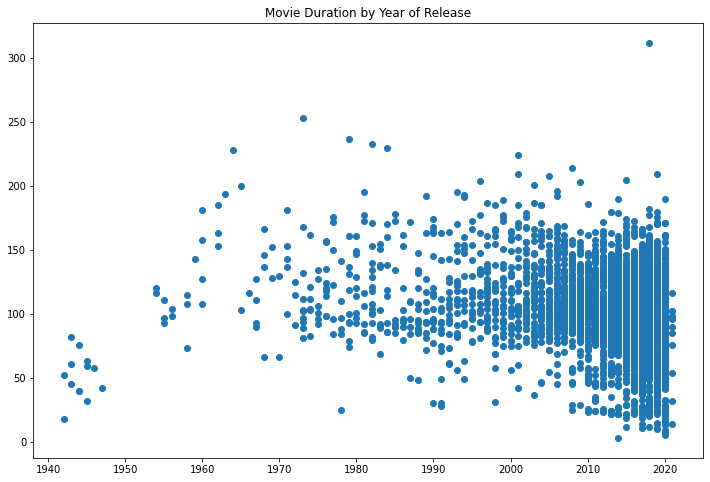

In [10]:
fig = plt.figure(figsize=(12,8)) #Creating a figure and increase the figure size

plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration']) #Creating a scatter plot of duration versus year

plt.title("Movie Duration by Year of Release") #Setting a title

plt.show()

In [11]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']< 60] #Filtering for durations shorter than 60 minutes
short_movies.head(20) 

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. Let's explore the effect of these genres on our data by ploting them with a different color.

In [12]:
colors = []


for i, j in netflix_movies_col_subset.iterrows():
    if j['genre']== 'Children':
        colors.append("red")
    elif j['genre']== "Documentaries":
        colors.append("blue")
    elif j['genre']== "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        

print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


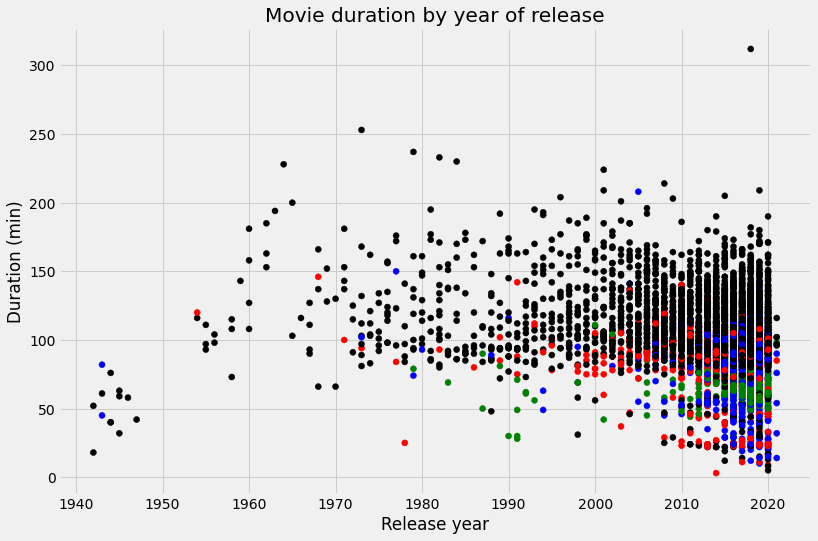

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'], c=colors)

plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")


plt.show()

We can notice that a non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.